In [38]:
%pip install pandas numpy scikit-learn matplotlib seaborn nltk 

Note: you may need to restart the kernel to use updated packages.


In [7]:

x= input()
y = int(input())
print(x*y)


333333


In [6]:
x=11
y=4
x=x%y
x=x%y
y=y%x
print(y)

1


In [52]:
tup = (1, 2, 4, 8)
tup = tup[1:-1]
tup = tup[0]
print(tup)



2


Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\Soham Kishor
[nltk_data]     Walam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Soham Kishor
[nltk_data]     Walam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Soham Kishor
[nltk_data]     Walam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load Dataset

In [ ]:

print("Loading dataset...")
df = pd.read_csv("./datasets/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv") 
df.head(5)

Loading dataset...


,reviews.text
0,I order 3 of them and one of the item is bad q...
1,Bulk is always the less expensive way to go fo...
2,Well they are not Duracell but for the price i...
3,Seem to work as well as name brand batteries a...
4,These batteries are very long lasting the pric...
5,Bought a lot of batteries for Christmas and th...
6,ive not had any problame with these batteries ...
7,Well if you are looking for cheap non-recharge...
8,These do not hold the amount of high power jui...
9,AmazonBasics AA AAA batteries have done well b...


Preprocessing

In [59]:
# Rename column if necessary
if 'reviews.text' in df.columns:
    df = df.rename(columns={'reviews.text': 'text'})

# Drop missing text
df = df.dropna(subset=['text'])

# Create sentiment column
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.rating'].apply(get_sentiment)

Valid Sentiment and Extraction

In [60]:

# Filter to only valid sentiments
valid_classes = ['positive', 'neutral', 'negative']
df = df[df['sentiment'].isin(valid_classes)]

# Balance dataset (optional)
min_samples = df['sentiment'].value_counts().min()
df_balanced = pd.concat([
    df[df['sentiment'] == label].sample(min_samples, random_state=42)
    for label in valid_classes
])

# Prepare features and labels
X = df_balanced['text']
y = df_balanced['sentiment']

# Save index for later
idx = df_balanced.index

Class Balancing

In [61]:
print("\nClass distribution before balancing:")
print(df['sentiment'].value_counts())

label_counts = df['sentiment'].value_counts()
existing_labels = label_counts[label_counts > 0].index.tolist()
min_samples = label_counts.min()

df = pd.concat([
    df[df['sentiment'] == label].sample(min_samples, random_state=42)
    for label in existing_labels
])



Class distribution before balancing:
sentiment
positive    25545
negative     1581
neutral      1206
Name: count, dtype: int64


Train test split and Vectorizing 

In [62]:
# Train/Test Split with index tracking
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, idx, test_size=0.2, random_state=42, stratify=y
)

# Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Evaluation


In [63]:
# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

Classification Confusion Matrix 


Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.79      0.73       241
     neutral       0.66      0.63      0.65       241
    positive       0.84      0.72      0.78       242

    accuracy                           0.72       724
   macro avg       0.72      0.72      0.72       724
weighted avg       0.72      0.72      0.72       724



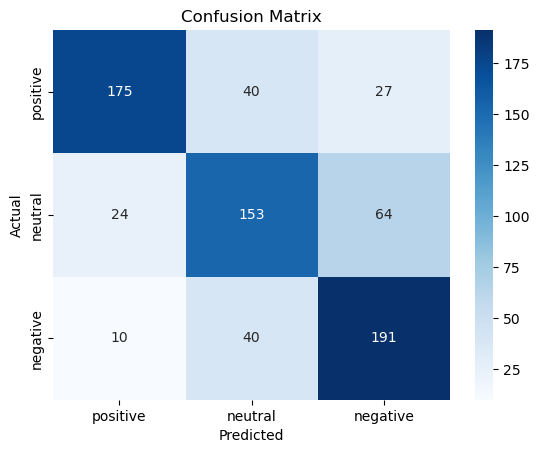

In [64]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=valid_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_classes, yticklabels=valid_classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Test Samples (correct)

In [65]:
# Show Correctly Classified Samples
print("\n✅ Sample Correctly Classified Reviews:\n")
correct_idx = idx_test[(y_pred == y_test.values)]
correct_samples = df_balanced.loc[correct_idx, ['text', 'sentiment']].sample(5, random_state=1)

for i, row in correct_samples.iterrows():
    print(f"Predicted: {row['sentiment'].upper()}\nReview: {row['text']}\n{'-'*80}")


✅ Sample Correctly Classified Reviews:

Predicted: NEGATIVE
Review: I have used these batteries in several items from flashlights to toys. I have found them less than adaquate for the items they were used in. In my flashlights, I have found they last with average use about 3 weeks. Not very good. For controllers like TV remotes, they last less than a month. They may be cheper in the short run but they become much more expensive in the long run. I will not buy them again and suggest paying a bit more and getting the name brand batteries.
--------------------------------------------------------------------------------
Predicted: NEUTRAL
Review: This product works, but works slow compared to Apple and some Android phones/tablets. Like I stated in my summary... you pay for what you get. No major issues thus far.
--------------------------------------------------------------------------------
Predicted: NEUTRAL
Review: Screen larger than phone. Visual better...........
--------------------

Test Samples (Incorrect)

In [66]:
# Show Misclassified Samples
print("\n❌ Sample Misclassified Reviews:\n")
misclassified_idx = idx_test[(y_pred != y_test.values)]
misclassified_samples = df_balanced.loc[misclassified_idx, ['text', 'sentiment']].sample(5, random_state=1)

for i, row in misclassified_samples.iterrows():
    print(f"True Sentiment: {row['sentiment'].upper()}\nReview: {row['text']}\n{'-'*80}")


❌ Sample Misclassified Reviews:

True Sentiment: NEUTRAL
Review: I like these shoes but Altra needs to pay more attention to sizing. I normally wear US 7.5-8. The first pair of Superior 2.0s I ordered was size 8 and they were way too short. OK, I thought, they run short. I ordered a pair size 8.5 and they were just barely long enough.I ordered a second pair size 8.5 and they are visibly half an inch shorter than the first size 8.5 pair. That isn't running short, it's lack of quality control.I really like these shoes, so I am ordering size 9's. But I do not have any warm feelings about Altra.
--------------------------------------------------------------------------------
True Sentiment: NEUTRAL
Review: Bought the fire for my mother who is 72 to learn how to use a computer the price was right and she can use it to search the web
--------------------------------------------------------------------------------
True Sentiment: NEUTRAL
Review: These are different than the ones pictured. Ar